In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


Bad key "text.kerning_factor" on line 4 in
C:\Users\hp\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df = pd.read_csv('C:\\Users\\hp\\Project-Data-Set-Repository\\Data set\\cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [9]:
df['default payment next month'].mean()

0.2217971797179718

In [10]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [5]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [20]:
lr_model = LogisticRegression(C = 1.0, 
                              class_weight = None, 
                              dual = False, 
                              fit_intercept = True,
                             intercept_scaling = 1,
                             max_iter = 100,
                             multi_class = 'auto',
                             n_jobs = None,
                             penalty = 'l2',
                             random_state = None,
                             solver = 'warn',
                             tol = 0.0001,
                             verbose = 0,
                             warm_start = False)

In [21]:
lr_model

LogisticRegression(solver='warn')

In [22]:
lr_model.C = 0.1
lr_model.solver = 'liblinear'
lr_model

LogisticRegression(C=0.1, solver='liblinear')

In [23]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [24]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
lr_model.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [26]:
new_x = df['EDUCATION'][10:20].values.reshape(-1,1)
new_x

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [27]:
lr_model.predict(new_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [30]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [31]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

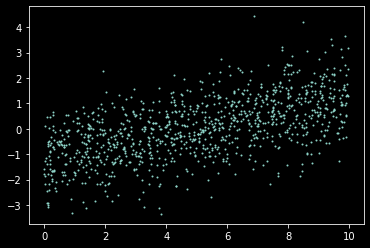

In [33]:
plt.style.use('dark_background')
plt.scatter(X,y,s=1)
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [35]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [36]:
y_pred = lin_reg.predict(X.reshape(-1,1))

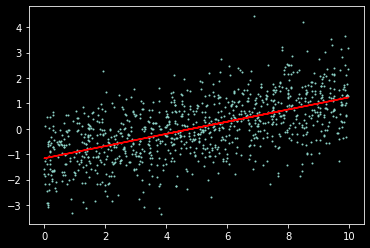

In [37]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [42]:
print(np.mean(y_train), np.mean(y_test))

0.223102526838873 0.21657603600225014


In [47]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

In [48]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [49]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [50]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [51]:
P = sum(y_test)
P

1155

In [54]:
TP = sum( (y_test==1) & (y_pred==1) )
print(TP)
TPR = TP/P
print(TPR)

0
0.0


In [55]:
FN = sum( (y_test==1) & (y_pred==0) )
print(FN)
FNR = FN/P
print(FNR)

1155
1.0


In [56]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [57]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [58]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [59]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [60]:
prob_sum.shape

(5333,)

In [61]:
np.unique(prob_sum)

array([1.])

In [62]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <a list of 10 Patch objects>)

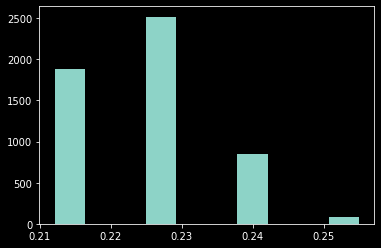

In [63]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

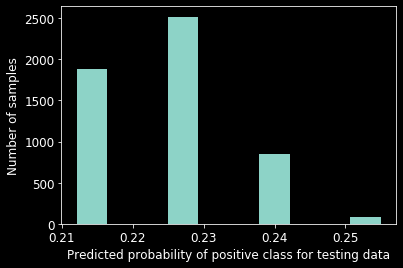

In [64]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [65]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

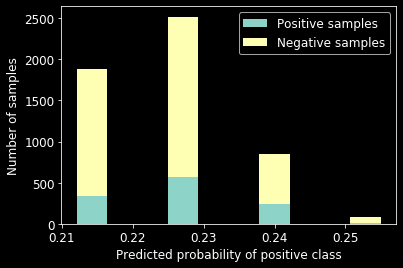

In [66]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [67]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
print(fpr, tpr, thresholds)

[0.         0.01842987 0.16419339 0.63140258 1.        ] [0.         0.004329   0.21212121 0.7030303  1.        ] [1.2549944  0.2549944  0.24007604 0.22576598 0.21207085]


_________________________________________________________________________
**Now, plot the ROC curve.**


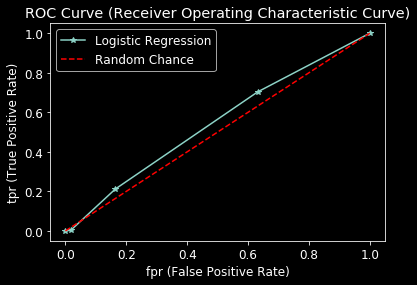

In [68]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve (Receiver Operating Characteristic Curve)')
plt.show()

In [74]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [69]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [70]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
print(precision, recall, thresholds)

[0.21657604 0.23536232 0.26315789 0.06097561 1.        ] [1.         0.7030303  0.21212121 0.004329   0.        ] [0.21207085 0.22576598 0.24007604 0.2549944 ]


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


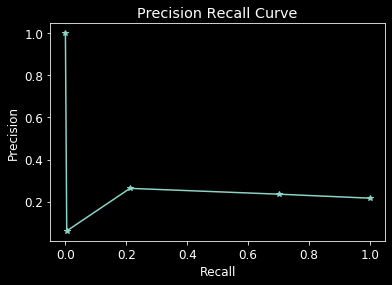

In [71]:
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [72]:
metrics.auc(recall, precision) # auc is a function used to calculate area under curve

0.22544274282968607

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

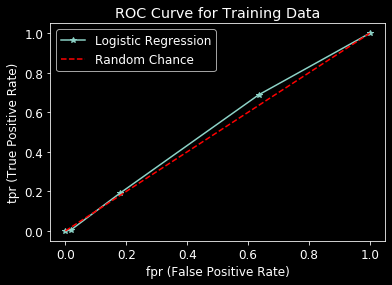

In [73]:

# getting the training samples probability predictions
y_train_prob = example_lr.predict_proba(X_train)

# retriving all positiv class probabilities
train_pos_proba = y_train_prob[:,1]

# getting the required parameters
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_pos_proba)

# plotting roc-auc cuve
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve for Training Data')
plt.show()

    How is this different, conceptually and quantitatively, from your earlier calculation?
